Uso de las librerias Scipy y Numpy para variables aleatorias continuas.

# Demostración presentacion

Empezamos realizando algunos calculos de la presentacion con SymPy. Demostramos que si la funcion de distribucion es $$F_X(x) = \frac{e^x}{1+e^x},\quad x\in \mathbb{R}$$ <br> Entonces la fdp es $$f_X(x) = \frac{e^x}{(1+e^x)^2} $$

In [27]:
from sympy import diff, factor, pretty_print
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
Fx = exp(x)/(1.+exp(x))
fx = diff(Fx, x)
pretty_print(factor(fx))

          x    
     1.0*e     
---------------
              2
/     x      \ 
\1.0*e  + 1.0/ 


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


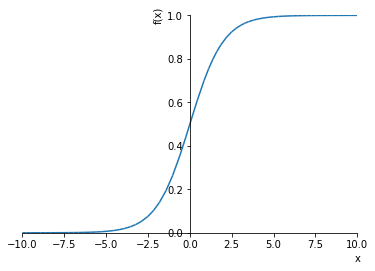

In [9]:
from sympy.plotting import plot
p1 = plot(Fx)

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


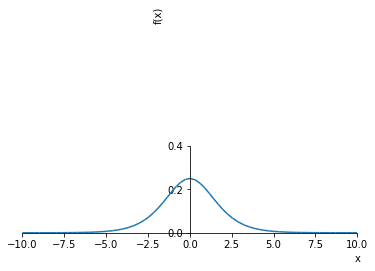

In [10]:
p2 = plot(fx)

In [33]:
from sympy import integrate, oo
pretty_print(integrate(fx, (x, -oo, oo)))

1.00000000000000


# Univariado

[Numpy](https://het.as.utexas.edu/HET/Software/Numpy/reference/routines.random.html) y [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) traen en su repertorio varias distribuciones continuas. Ejemplos [Duke University](https://people.duke.edu/~ccc14/sta-663-2017/15A_Random_Numbers.html).

In [24]:
def expon_pdf(x, lmabd=1):
    """PDF of exponential distribution."""
    return lmabd*np.exp(-lmabd*x)

def expon_cdf(x, lambd=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-lambd*x)

def expon_icdf(p, lambd=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/lambd

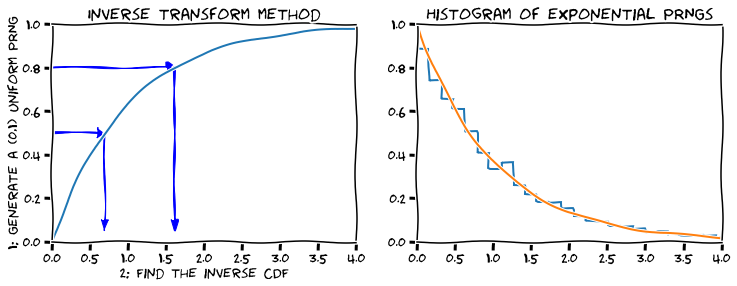

In [41]:
import scipy.stats as stats

dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, expon_cdf(x))
    plt.axis([0, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
        plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generate a (0,1) uniform PRNG')
    plt.xlabel('2: Find the inverse CDF')
    plt.title('Inverse transform method');

    plt.subplot(122)
    u = np.random.random(10000)
    v = expon_icdf(u)
    plt.hist(v, histtype='step', density=true, bins=100, linewidth=2)
    plt.plot(x, expon_pdf(x), linewidth=2)
    plt.axis([0,4,0,1])
    plt.title('Histogram of exponential PRNGs');

# Multivariado

In [42]:
from numpy.random import multivariate_normal

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [58]:
var1 = 1.0
var2 = 4.0
cov = 0
cov_mat = [[var1, cov],[cov, var2]]
data = multivariate_normal([0,0], cov_mat, size= 1000)

In [45]:
data.shape

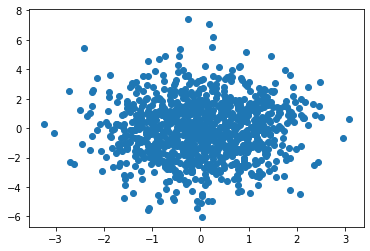

In [59]:
plt.scatter(data[:,0],data[:,1])